In [2]:
#import libraries

import rasterio as rs
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
from osgeo import gdal
from rasterio.plot import show
import os

print('*********** Libraries were imported successfuly **********')
print('working directory: '+ str(os.getcwd()))

*********** Libraries were imported successfuly **********
working directory: C:\Users\s79631\Documents\Python_ökoneu


**************** Image imported successfuly **************
**********************************************************
*********************** Image data ***********************
Number of bands: 1
Coordinate Reference System: EPSG:25833
Image width:`20549
Image height:`28889
Number of Pixels:`593640061
**********************************************************


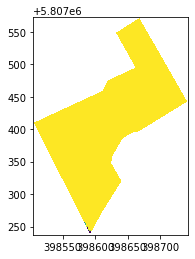

-32807.953

In [3]:
##Change directory to file folder
##os.chdir('D:\TEMP\20200324_Sentinel2A')

## open image to classify

gdal.UseExceptions()
img = rs.open ('20200304_roethepfuhl_chm_7_clipp.tif')

print('**************** Image imported successfuly **************')

## Print image data
print('**********************************************************')
print('*********************** Image data ***********************')
print('Number of bands: ' + str(img.count))
print('Coordinate Reference System: ' + str(img.crs))
print('Image width:`' + str(img.width))
print('Image height:`' + str(img.height))
print('Number of Pixels:`' + str(int(img.height)*int(img.width)))
print('**********************************************************')
show(img)

## get bands
Band1 = img.read(1)

## stats
from scipy import stats
np.nanmin(Band1)  #activate just if needed

In [4]:
New_data = Band1
seeker_column = 0
while seeker_column < img.height:
    seeker_row = 0
    while seeker_row < img.width:
        if Band1[seeker_column, seeker_row] < 0:
            New_data[seeker_column, seeker_row] = 0
        else:
            New_data[seeker_column, seeker_row] = Band1[seeker_column, seeker_row]
        seeker_row = seeker_row + 1
    seeker_column = seeker_column + 1

with rs.open(
    '20200304_roethepfuhl_chm_7_clipp_python.tif',
    'w',
    driver='GTiff',
    height=New_data.shape[0],
    width=New_data.shape[1],
    count=1,
    dtype=New_data.dtype,
    crs='epsg:25833',
    transform=img.transform,
) as dst:
    dst.write(New_data, 1)

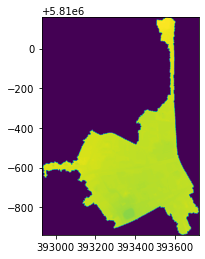

<closed DatasetWriter name='DTM_BuckowerDorfteich_Catchment_fill_clipped_ready_to_fill_2.tif' mode='w'>


In [36]:
img1 = rs.open ('DTM_BuckowerDorfteich_Catchment_fill_clipped_ready_to_fill_2.tif')
show(img1)
print(dst)

In [30]:
print (New_data,0)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 0
